## **Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')


print(dataset.head())
print(dataset.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 1599


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)

In [ ]:

weight_vector= np.random.randint(X.shape[1])
intercept=0
learning_rate = 0.001

In [ ]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   

   
        
        
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

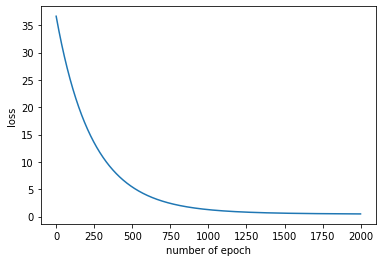

In [ ]:
w,b=gradient_descent(X_transform,y)

## **Matrix Problem**

In [1]:
input = [[1,0,1,0,1],
        [0,1,0,1,0],
        [0,1,1,1,0],
        [0,1,0,1,0],
        [1,0,1,0,1]]

In [2]:
num_components = 0
for k in input:
    print(k)
    num_components += sum(k)
num_components

[1, 0, 1, 0, 1]
[0, 1, 0, 1, 0]
[0, 1, 1, 1, 0]
[0, 1, 0, 1, 0]
[1, 0, 1, 0, 1]


13

In [3]:
len(input[0])

5

In [4]:
for i in range(len(input)):
    for j in range(len(input[i])-1):
        print(j)

0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3


In [5]:
num_components = 0
for k in input:
    print(k)
    num_components += sum(k)
num_components

[1, 0, 1, 0, 1]
[0, 1, 0, 1, 0]
[0, 1, 1, 1, 0]
[0, 1, 0, 1, 0]
[1, 0, 1, 0, 1]


13

In [6]:
#
def num_horizontal(input, num_h):
    for i in range(len(input)):
        for j in range(len(input[i])-1):
            if input[i][j] == 1:
                if input[i][j+1] == 1:
                    num_h -= 1
    return num_h
h = num_horizontal(input, num_components)
h

11

In [7]:
def num_vertical(input, num_v):
    for i in range(len(input)-1):
        for j in range(len(input[i])):
            if input[i][j] == 1:
                if input[i+1][j] == 1:
                    num_v -= 1
    return num_v
v = num_horizontal(input, num_components)
v

11

In [8]:
def num_hv(input, num_hv):
    for i in range(len(input)-1):
        for j in range(len(input[i])-1):
            if input[i][j] == 1:
                if input[i+1][j] == 1:
                    num_hv -= 1
                elif input[i][j+1] == 1:
                    num_hv -= 1
    return num_hv
hv = num_hv(input, num_components)
hv

8

In [ ]:
def num_diagonal(input, num_d):
    for i in range(1,len(input)-1):
        for j in range(1,len(input[i])-1):
            if input[i][j] == 1:
                if input[i+1][j+1] == 1:
                    num_d -= 1
                elif input[i+1][j-1] == 1:
                    num_d -= 1
                elif input[i-1][j+1] == 1:
                    num_d -= 1
                elif input[i-1][j+1] == 1:
                    num_d -= 1
                else:
                    pass
    return num_d
d = num_diagonal(input, num_components)
d